In [1]:
%matplotlib inline


# Gaussian Mixture Model Ellipsoids


Plot the confidence ellipsoids of a mixture of a Gaussian
obtained with Expectation Maximisation (``GaussianMixture`` class)

Both models have access to three components with which to fit the data. Note
that the Expectation Maximisation model will necessarily use all three
components. Here we can see that the Expectation
Maximisation model splits some components arbitrarily, because it is trying to
fit too many components



     pointx    pointy
0 -1.861331 -2.991683
1 -2.170092 -3.292318
2 -1.014081  0.385795
3 -2.912943 -2.579539
4  0.035721 -0.799698
 The covariance Matrix  is: 

[[[ 1.23856256 -0.09316563]
  [-0.09316563  2.02291629]]

 [[ 2.2216601   0.15446244]
  [ 0.15446244  2.094973  ]]

 [[ 1.91930032  0.14344635]
  [ 0.14344635  2.57669337]]]


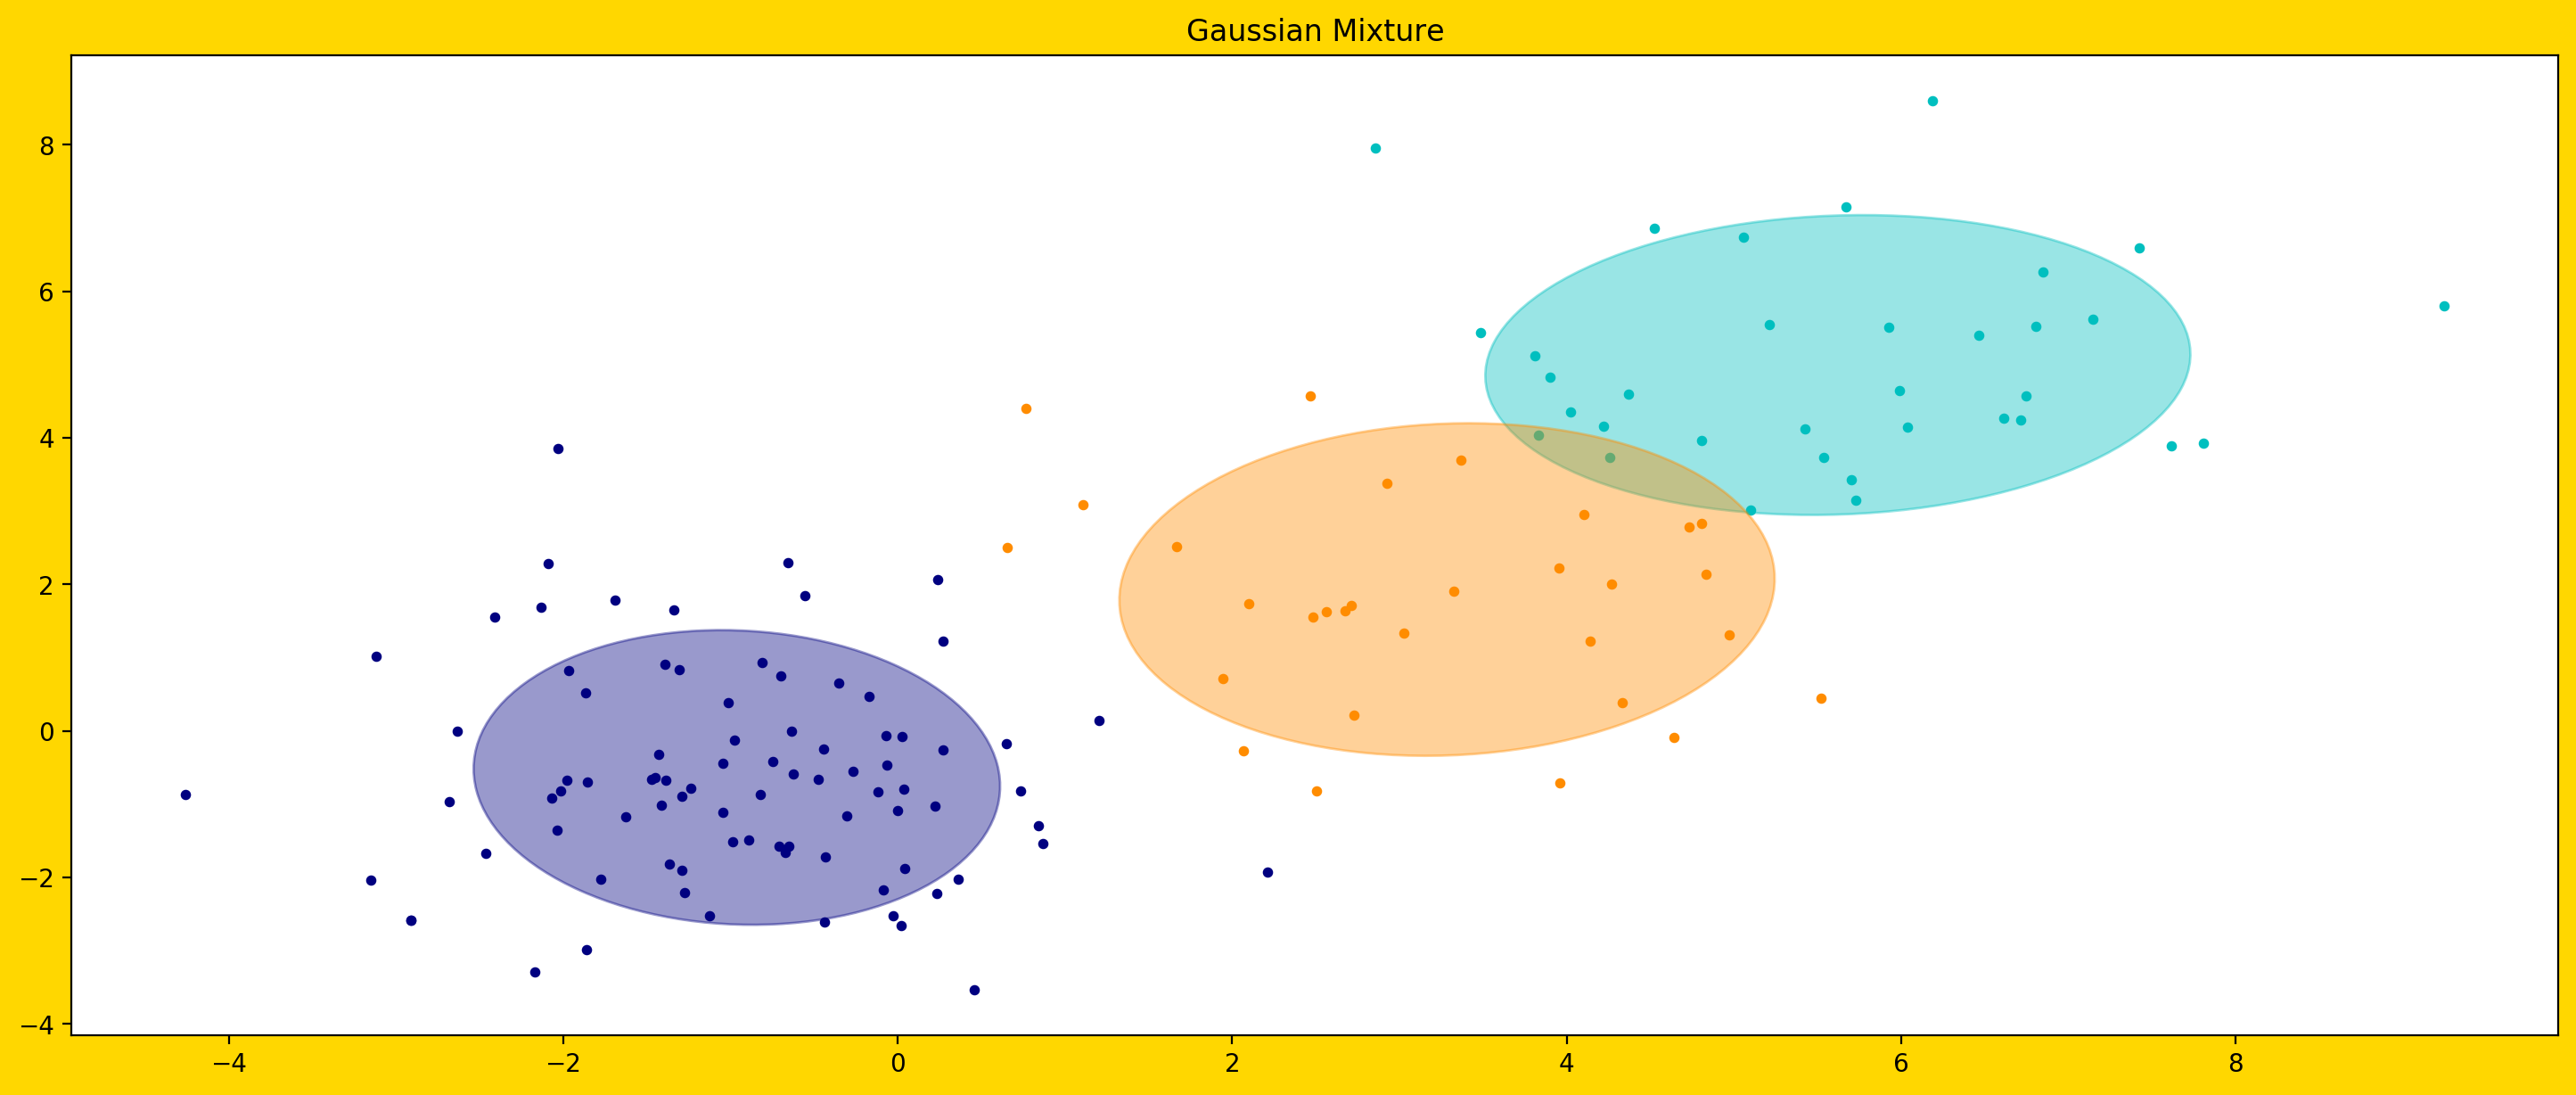

In [69]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture


data = pd.read_csv("C:\\Users\\Peter\\Desktop\\Classes\\INF 552\\Homework 2\\clusters.txt",dtype={'High': np.float64, 'Low': np.float64},names=["pointx", "pointy"])
print(data.head())
# new_header =['pointx','pointy']
# data.columnsumns = new_header
data = data.apply(pd.to_numeric, errors='coerce')
np.array(data)

colors = ['navy', 'c', 'darkorange']


def plot_results(X, Y, gmm_mean, gmm_covariance):
    splot = plt.subplot(211)
    for i in range(0,n_components):
        mean_2 = gmm_mean
        covar = gmm_covariance[i]
#         print(f'this is the {i} value of {mean_2[i]}')
        for j in range(len(Y)):
            if Y[j] == i:
                plt.scatter(X[j, 0], X[j, 1], 10, color=colors[i])
        # Plot ellipse
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        
        angle = np.arctan(u[1]/u[0])* 180./np.pi# convert to degrees

        ellipse = mpl.patches.Ellipse(mean_2[i], v[0], v[1], 180. + angle, color=colors[i])
        ellipse.set_clip_box(splot.bbox)
        ellipse.set_alpha(0.4)
        splot.add_artist(ellipse)
    plt.title('Gaussian Mixture')

np.random.seed(0)
X = np.array(data)
fig=plt.figure(figsize=(18, 16), dpi= 200, facecolor='gold', edgecolor='k')
n_components=3
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full').fit(X)

Y = gmm.predict(X)
gmm_mean = gmm.means_
gmm_covariance = gmm.covariances_
plot_results(X, Y, gmm_mean, gmm_covariance)

print(f' The covariance Matrix  is: \n\n{gmm_covariance}')

plt.show()